In [1]:
library(tidyverse)
library(GGally)

scientific_10 = function(x) {
  ifelse(
    x==0, "0",
    parse(text = sub("e[+]?", " %*% 10^", scales::scientific_format()(x)))
  )
} 

Warning message:
"package 'tidyverse' was built under R version 4.1.3"
Warning message:
"package 'ggplot2' was built under R version 4.1.3"
Warning message:
"package 'tibble' was built under R version 4.1.3"
Warning message:
"package 'tidyr' was built under R version 4.1.3"
Warning message:
"package 'readr' was built under R version 4.1.3"
Warning message:
"package 'purrr' was built under R version 4.1.3"
Warning message:
"package 'dplyr' was built under R version 4.1.3"
Warning message:
"package 'stringr' was built under R version 4.1.3"
Warning message:
"package 'forcats' was built under R version 4.1.3"
Warning message:
"package 'lubridate' was built under R version 4.1.3"
-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.2     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.0     v tibble    3.2.1
v lubridate 1.9.2     v tidyr     1.3.0
v purrr     1.0.1     
-- Conflicts --------------------------------------

In [2]:
all.df <- read.csv("L2_similarity_comparisons.csv")[-1]

In [3]:
names(all.df)

[1] "time"            "prec_similiar_L" "prec_similiar_R" "savename"

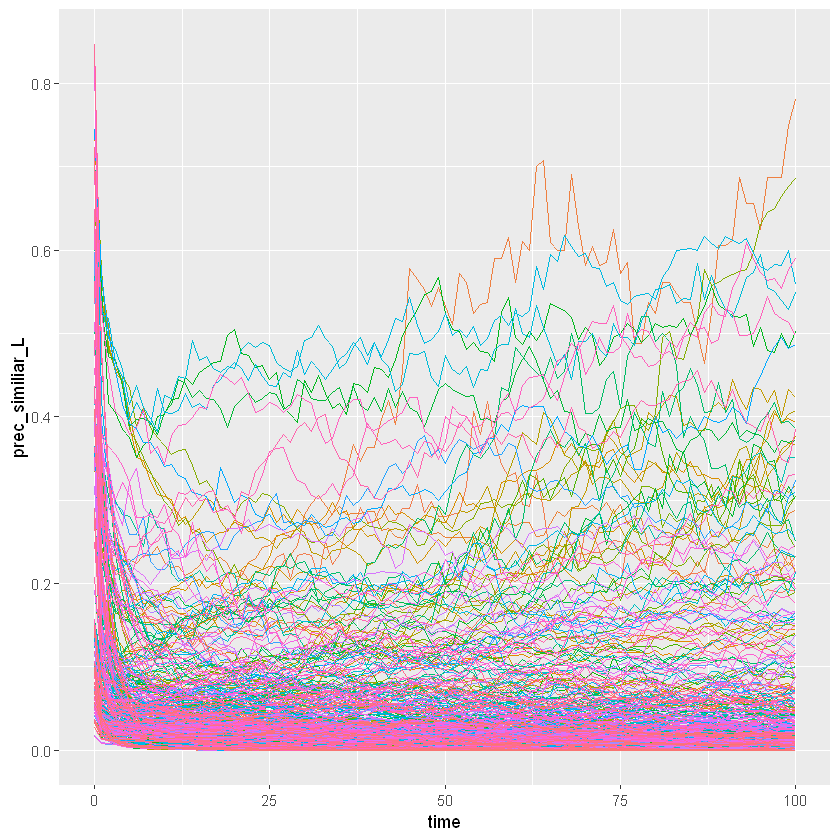

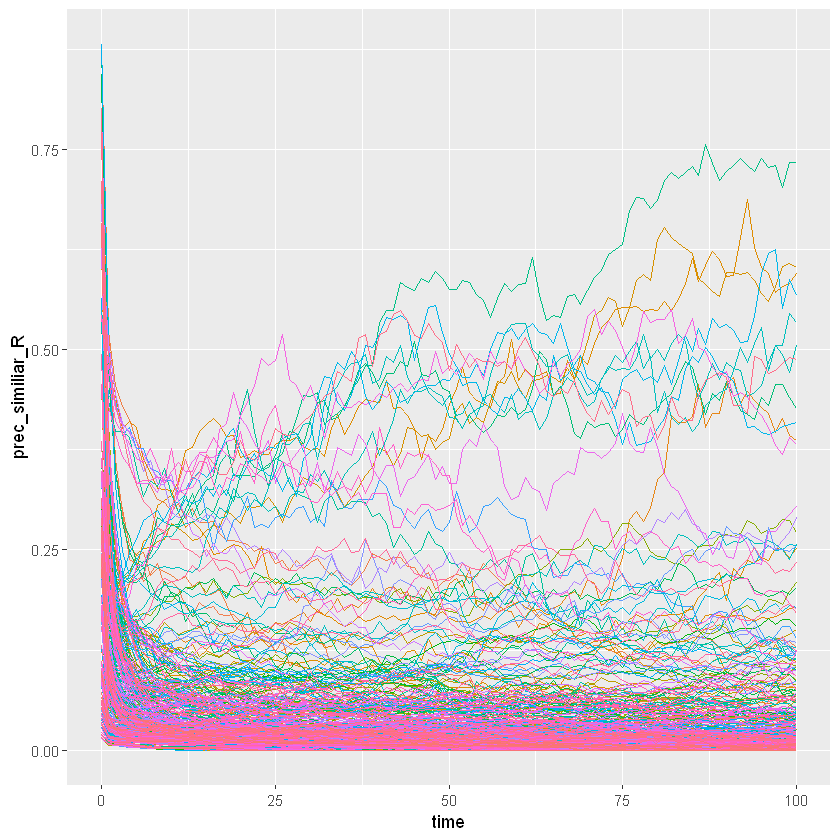

In [5]:
p <- ggplot(all.df) + 
        geom_line(aes(x = time, y = prec_similiar_L, color=savename)) + 
        theme(legend.position = "none")

q <- ggplot(all.df) + 
        geom_line(aes(x = time, y = prec_similiar_R, color=savename))+ 
        theme(legend.position = "none")

p
q

In [27]:
all.df$diff = (all.df$prec_similiar_L - all.df$prec_similiar_R)
all.df$sum = all.df$prec_similiar_L + all.df$prec_similiar_R
all.df$coexist = all.df$prec_similiar_L * all.df$prec_similiar_R > (0.1^2)
all.df$coexist.val = sqrt(all.df$prec_similiar_L * all.df$prec_similiar_R)
all.df$domination = (all.df$diff == all.df$sum) & !(all.df$coexist)

stable.coexist <- all.df %>% filter(coexist == TRUE) %>% filter(time == 100) %>% select(savename)

head(all.df)
long.df <- all.df %>% 
    select(time, savename, prec_similiar_L, prec_similiar_R, coexist, coexist.val, domination) %>%
    pivot_longer(cols = c(prec_similiar_L, prec_similiar_R), 
                    names_to = "side", 
                    values_to = "similarity") %>%
    mutate(stable.coexist = savename %in% stable.coexist$savename)%>%
    mutate(side = str_replace(side, "prec_similiar_", "Input ")) 

,time,prec_similiar_L,prec_similiar_R,savename,diff,sum,coexist,coexist.val,domination,destruction
,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<lgl>,<dbl>,<lgl>,<lgl>
1,0,0.8467742,0.15322581,run_data/2188164550202588541.json,0.69354839,1.00000000,TRUE,0.36020502,FALSE,FALSE
2,1,0.4185464,0.10055866,run_data/2188164550202588541.json,0.31798771,0.51910503,TRUE,0.20515473,FALSE,FALSE
3,10,0.1221239,0.08705882,run_data/2188164550202588541.json,0.03506507,0.20918272,TRUE,0.10311141,FALSE,TRUE
4,100,0.0550055,0.03825858,run_data/2188164550202588541.json,0.01674693,0.09326408,FALSE,0.04587409,FALSE,TRUE
5,11,0.1157895,0.08920188,run_data/2188164550202588541.json,0.02658760,0.20499135,TRUE,0.10162991,FALSE,TRUE
6,12,0.1146712,0.08425721,run_data/2188164550202588541.json,0.03041396,0.19892837,FALSE,0.09829482,FALSE,TRUE


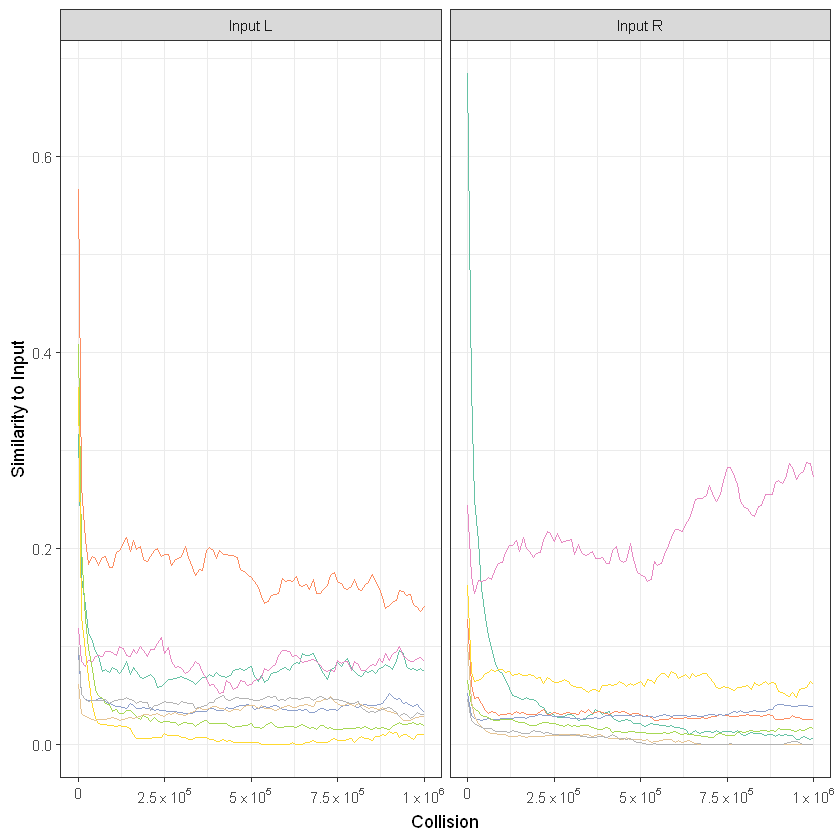

In [37]:
p <- ggplot(long.df %>% 
                filter(savename %in% (long.df %>% 
                                        sample_n(8) %>%
                                        select(savename) %>% 
                                        unlist(use.names=FALSE)))) +
        geom_line(aes(x=time*10000, y = similarity, color = savename)) + 
        # scale_y_log10() + 
        facet_wrap(~side, nrow=1) + 
        scale_color_brewer(palette = "Set2") +
        theme_bw(base_size = 11) + 
        theme(legend.position = 'none') + 
        labs(y = "Similarity to Input", x = "Collision") +
        scale_x_continuous(labels = scientific_10)
ggsave("Coexisting_L2_v2.svg", p, width = (2/3)*183, height = 247/4, units = "mm")
p


In [29]:
all.df <- all.df %>% mutate(destruction = ifelse((!coexist) & (!domination), TRUE, FALSE))

last.df <- all.df %>% filter(time == 100)

outcome <- last.df %>% 
            select(domination, destruction, coexist, savename) %>%
            summarise(p_domination = mean(domination),
                        p_coexist = mean(coexist),
                        p_destruction = mean(destruction),
                        N = n())
head(outcome)
rowSums(outcome)

,p_domination,p_coexist,p_destruction,N
,<dbl>,<dbl>,<dbl>,<int>
1,0.2659341,0.05054945,0.6835165,455


[1] 456

time,savename,coexist,coexist.val,domination,side,similarity,stable.coexist
<int>,<chr>,<lgl>,<dbl>,<lgl>,<chr>,<dbl>,<lgl>
0,run_data/2188164550202588541.json,TRUE,0.3602050,FALSE,Input L,0.84677419,TRUE
0,run_data/2188164550202588541.json,TRUE,0.3602050,FALSE,Input R,0.15322581,TRUE
1,run_data/2188164550202588541.json,TRUE,0.2051547,FALSE,Input L,0.41854637,TRUE
1,run_data/2188164550202588541.json,TRUE,0.2051547,FALSE,Input R,0.10055866,TRUE
10,run_data/2188164550202588541.json,TRUE,0.1031114,FALSE,Input L,0.12212389,TRUE
10,run_data/2188164550202588541.json,TRUE,0.1031114,FALSE,Input R,0.08705882,TRUE


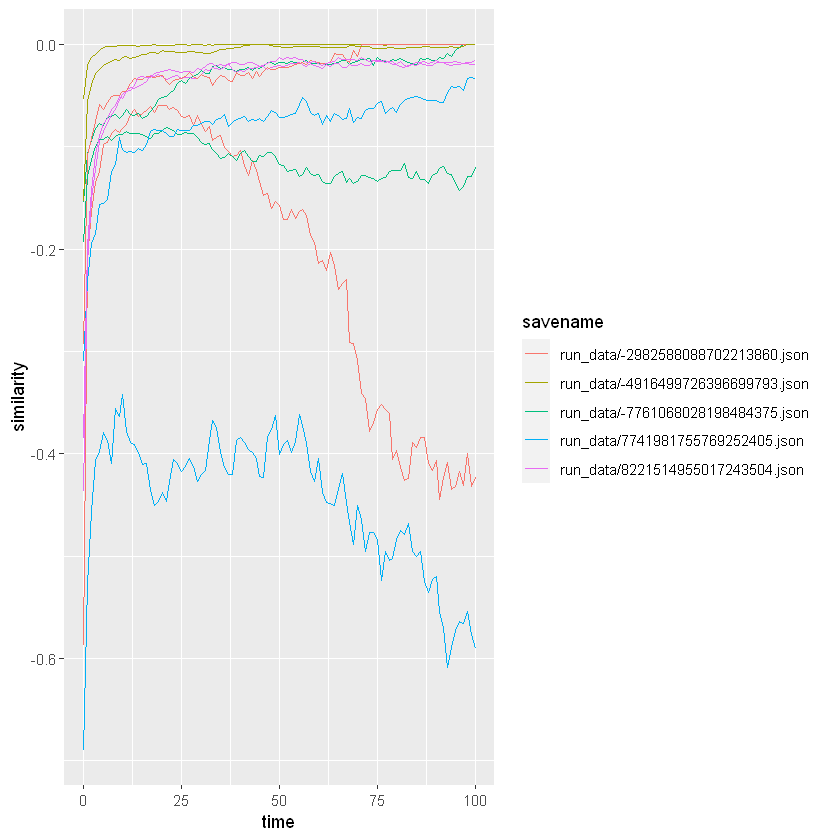

In [17]:
head(long.df)
corrector.long.df <- long.df %>% 
                        mutate(side = str_replace(side, "prec_similiar_", "")) %>%
                        mutate(label = paste(side, savename),
                                corrector = ifelse(side == "L", 1, -1)) %>%
                        mutate(similarity = similarity * corrector)
sub.corrector <- corrector.long.df %>% 
                    filter(savename %in% (corrector.long.df %>% 
                                    sample_n(5) %>%
                                    select(savename) %>% 
                                    unlist(use.names=FALSE)))
     
p <- ggplot(sub.corrector) + 
        geom_line(aes(x = time, 
                      y = similarity,
                      color = savename,
                      group=label))
p

In [ ]:

ggplot(all.df %>% filter(time > 0)) +
    geom_line(aes(y = sum, x = diff, color=(time))) + 
    scale_color_viridis_c() + 
    geom_abline(intercept = 0, slope = 1) + 
    geom_abline(intercept = 0, slope = -1) + 
    facet_wrap(~savename)

In [46]:
sum(all.df %>% filter(time == 100) %>% select(coexist))
all.df %>% filter(coexist == TRUE)

[1] 1

time,prec_similiar_L,prec_similiar_R,savename,diff,sum,coexist,domination
<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<lgl>,<lgl>
0,66.66667,66.66667,run_data/3252114963483950065.json,0.00,133.3333,TRUE,FALSE
1,34.05000,33.25000,run_data/3252114963483950065.json,0.80,67.3000,TRUE,FALSE
10,26.85000,28.30000,run_data/3252114963483950065.json,1.45,55.1500,TRUE,FALSE
11,29.55000,28.30000,run_data/3252114963483950065.json,1.25,57.8500,TRUE,FALSE
12,30.45000,26.80000,run_data/3252114963483950065.json,3.65,57.2500,TRUE,FALSE
13,31.50000,28.80000,run_data/3252114963483950065.json,2.70,60.3000,TRUE,FALSE
14,31.85000,26.40000,run_data/3252114963483950065.json,5.45,58.2500,TRUE,FALSE
15,31.80000,23.95000,run_data/3252114963483950065.json,7.85,55.7500,TRUE,FALSE
16,31.70000,22.35000,run_data/3252114963483950065.json,9.35,54.0500,TRUE,FALSE


In [44]:
length(unique(all.df$savename))

[1] 14

In [47]:
all.ts <- read.csv("L2_hunt_analyzed.csv")[-1]

In [54]:
coexist_ts <- all.ts %>% filter(savename %in% (all.df %>% filter(coexist == TRUE, time==100) %>% select(savename)%>% unlist()))

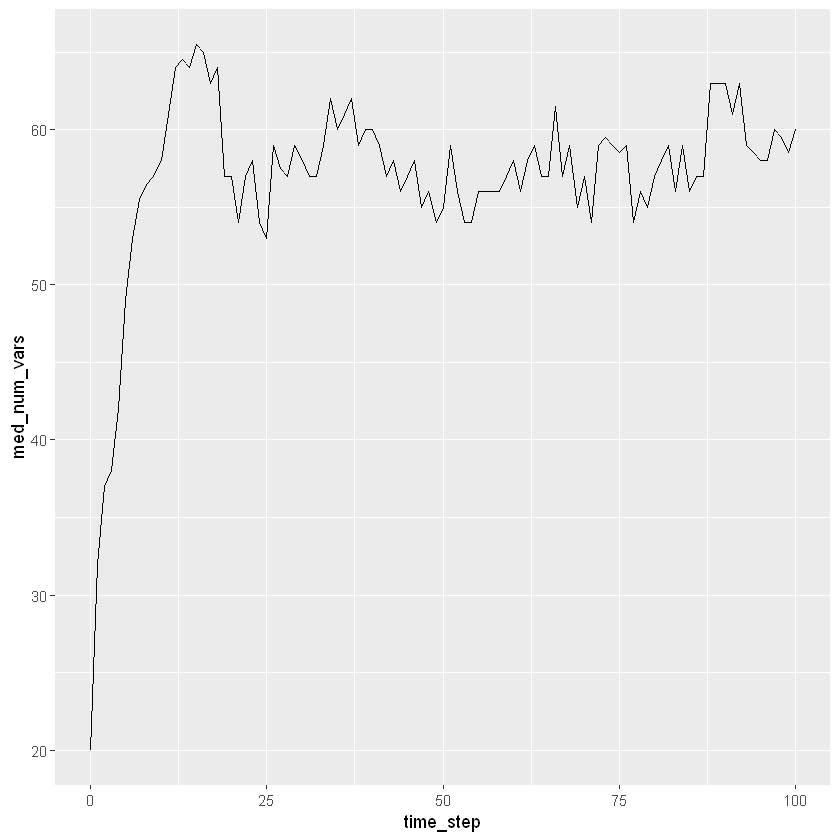

In [64]:
ggplot(coexist_ts) + geom_line(aes(x = time_step, y =med_num_vars))

In [60]:
names(coexist_ts)

[1] "count"               "pop_entropy"         "new_exprs"          
 [4] "time_step"           "ave_num_vars"        "std_num_vars"       
 [7] "med_num_vars"        "ave_expr_len"        "std_expr_len"       
[10] "med_expr_len"        "savename"            "directory"          
[13] "name"                "random_seed"         "max_objects"        
[16] "n_collisions"        "output_freq"         "input_file"         
[19] "copy_allowed"        "heap"                "max_steps"          
[22] "symbol_table_size"   "stack_size"          "max_len_identifer"  
[25] "max_len_basis_types" "var_prefix"          "error_file"         
[28] "max_depth"           "n_vars"              "bind_all_free_vars" 
[31] "p_range_app"         "p_range_abs"